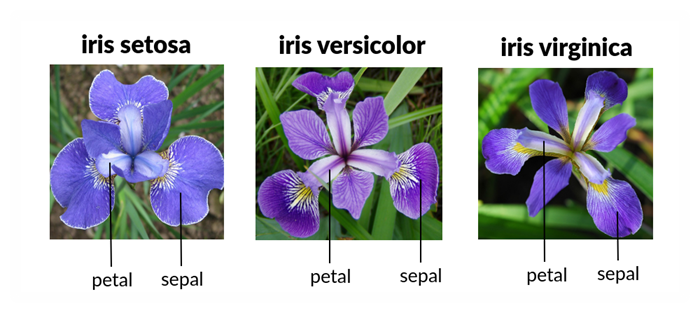

Image url: https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2F%40Nivitus.%2Firis-flower-classification-machine-learning-d4e337140fa4&psig=AOvVaw1YtV883t8xeMG717mbJ6TF&ust=1604087434303000&source=images&cd=vfe&ved=0CA0QjhxqFwoTCOisscPJ2uwCFQAAAAAdAAAAABAJ

Iris.csv file: https://www.kaggle.com/uciml/iris

# Objective


```
# read Iris.csv file from pc
# analyze data
# create a decision tree model to classify Iris species based on parameters
```






In [ ]:
#read data

import pandas as pd #use pandas libraly to read file
df=pd.read_csv('Iris.csv') #read Iris.csv file and keep it in 'df'
df.head() #show df in 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **columns description**


*   Id: number of order

*   SepalLengthCm: length of sepal measured in cm
*   SepalWidthCm: width of sepal measured in cm

*   PetalLengthCm: length of petal measured in cm
*   PetalWidthCm: width of petal measured in cm




*   Species: the name of the specie

# Analyze data

In [ ]:
#describe data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#data infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#no missing values from all columns

In [ ]:
import seaborn as sns
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


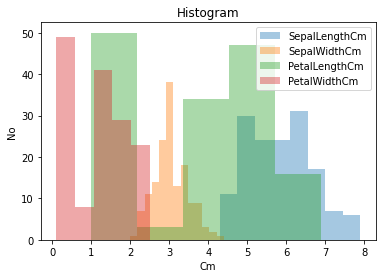

In [ ]:
#Distribution of numeracal variables

sns.distplot(a=df['SepalLengthCm'], label="SepalLengthCm", kde=False)
sns.distplot(a=df['SepalWidthCm'], label="SepalWidthCm", kde=False)
sns.distplot(a=df['PetalLengthCm'], label="PetalLengthCm", kde=False)
sns.distplot(a=df['PetalWidthCm'], label="PetalWidthCm", kde=False)
# Add title
plt.title("Histogram")
plt.xlabel("Cm")
plt.ylabel("No")
# Force legend to appear
plt.legend()

In [ ]:
#find the minimum and maximum of SepalLengthCm, SepalWidthCm, PetalLengthCm and	PetalWidthCm
target=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'] #store strings of  interested parameters
for para in target:
  #print min and max values of each parameter
  print(para+'/ min: '+str(min(df[para]))+' cm'+','+' max: '+str(max(df[para]))+' cm')


SepalLengthCm/ min: 4.3 cm, max: 7.9 cm
SepalWidthCm/ min: 2.0 cm, max: 4.4 cm
PetalLengthCm/ min: 1.0 cm, max: 6.9 cm
PetalWidthCm/ min: 0.1 cm, max: 2.5 cm


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


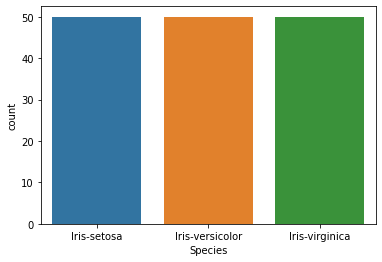

In [ ]:
#distribution of Species
sns.countplot('Species',data=df)

In [ ]:
#count each Species
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df[df['Species']=='Iris-setosa'].shape

(50, 6)

In [ ]:
df[df['Species']=='Iris-versicolor'].shape

(50, 6)

In [ ]:
df[df['Species']=='Iris-virginica'].shape

(50, 6)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

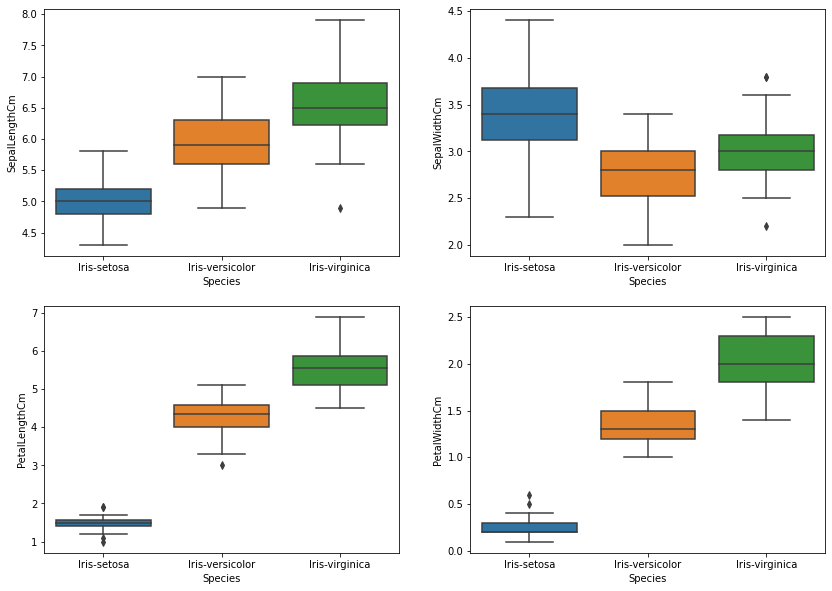

In [ ]:
#distribution of nemeric variables in each Species

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot('Species',target[0], data=df)
plt.subplot(2,2,2)
sns.boxplot('Species',target[1], data=df)
plt.subplot(2,2,3)
sns.boxplot('Species',target[2], data=df)
plt.subplot(2,2,4)
sns.boxplot('Species',target[3], data=df)

# Train a model

In [ ]:
#split test, train data into 80%, 20%
df_shaf=df.sample(frac=1)
df_shaf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
28,29,5.2,3.4,1.4,0.2,Iris-setosa
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
6,7,4.6,3.4,1.4,0.3,Iris-setosa
83,84,6.0,2.7,5.1,1.6,Iris-versicolor


In [ ]:
all_row=df_shaf.shape[0]
train_data=df_shaf.iloc[:int(all_row*0.8)]
train_data.shape

(120, 6)

In [ ]:
test_data=df_shaf.iloc[int(all_row*0.8):]
test_data.shape

(30, 6)

In [ ]:
#define input(x), output(y)

x=train_data[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y=train_data['Species']

In [ ]:
#decision tree classifyer: parameters

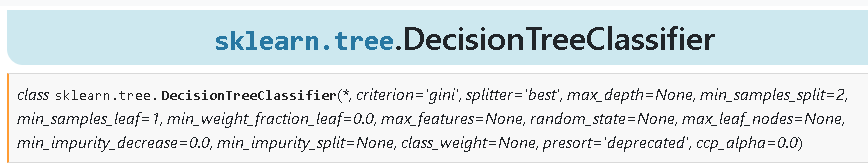

link: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

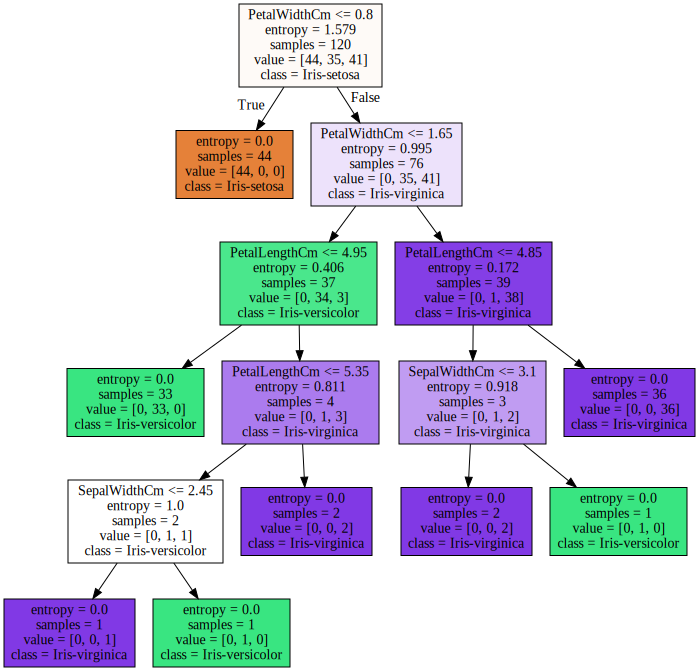

In [ ]:
#desicion tree

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x, y)
import graphviz 

#identify class name in y.unique()
class_name = [str(s) for s in y.unique()]
dot_data = tree.export_graphviz(clf, 
                                out_file=None,
                                feature_names=['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                                class_names=class_name, 
                                filled=True
                                ) 
graph = graphviz.Source(dot_data) 
graph

# Evauation

In [ ]:
#evaluation of training process

#1. by cross validation
from sklearn.model_selection import cross_val_score
#cross validation 5 times
scores = cross_val_score(clf, x, y, cv=5)
print('Accuracy:',scores.mean())

Accuracy: 0.9583333333333334


In [ ]:
#2. by acc score
from sklearn.metrics import accuracy_score
accuracy_score(y, clf.predict(x))

1.0

In [ ]:
#save mode
import joblib 
filename = 'tree.model'
clf = clf.fit(x, y)
joblib.dump(clf, filename)

['tree.model']

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x, y)
print(result)

1.0


In [ ]:
pred_results = loaded_model.predict(test_data[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

In [ ]:
#evaluation of test dataset

#confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(test_data['Species'], pred_results)

array([[ 6,  0,  0],
       [ 0, 14,  1],
       [ 0,  1,  8]])

In [ ]:
#acc of test dataset
from sklearn.metrics import accuracy_score
accuracy_score(test_data['Species'], pred_results)

0.9333333333333333

# Result

In [ ]:
#train acc = 1
#test acc = 0.93
#this model is slightly overfitting